# Task 1: Data Loading and Inspection

This task involves loading the dataset and inspecting its basic properties.


In [2]:
# Installing the needed packages
# %pip install pandas matplotlib seaborn

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Data/heart_data.csv')

## Inspect the dataset

This cell displays the first few rows of the dataframe.


In [7]:
# Display the first few rows of the dataframe
df.head()
# display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


This cell displays the information about the dataframe, including data types and non-null values.


In [8]:
# Display the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


This cell displays the descriptive statistics of the dataframe.


In [9]:
# Display the descriptive statistics of the dataframe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# Task 2: Data Cleaning

This task involves handling misrepresented data, missing values, and duplicates.


## 1. Handle Misrepresented Data

This cell checks data types and unique values for potential issues.


In [17]:
def analyze_column_types(df):
    for col in df.columns:
        print(f"\nColumn: {col}")
        print(f"Data type: {df[col].dtype}")
        
        # Get unique values
        unique_values = df[col].unique()
        
        # Handle different data types
        if df[col].dtype == 'object':
            print(f"Number of unique values: {len(unique_values)}")
            print(f"Top 20 unique values: {unique_values[:20]}...")
        elif df[col].dtype in ['int64', 'float64']:
            print(f"Number of unique values: {len(unique_values)}")
            print(f"Min value: {df[col].min()}")
            print(f"Max value: {df[col].max()}")
            print(f"Mean: {df[col].mean()}")
            print(f"Standard Deviation: {df[col].std()}")
        else:
            print(f"Number of unique values: {len(unique_values)}")
            print(f"Unique values: {unique_values}")
        
        print("---")

# Analyze column types
analyze_column_types(df)


Column: age
Data type: float64
Number of unique values: 41
Min value: 29.0
Max value: 77.0
Mean: 54.43894389438944
Standard Deviation: 9.038662442446746
---

Column: sex
Data type: float64
Number of unique values: 2
Min value: 0.0
Max value: 1.0
Mean: 0.6798679867986799
Standard Deviation: 0.46729882777012993
---

Column: cp
Data type: float64
Number of unique values: 4
Min value: 1.0
Max value: 4.0
Mean: 3.1584158415841586
Standard Deviation: 0.9601256119600138
---

Column: trestbps
Data type: float64
Number of unique values: 50
Min value: 94.0
Max value: 200.0
Mean: 131.68976897689768
Standard Deviation: 17.59974772958769
---

Column: chol
Data type: float64
Number of unique values: 152
Min value: 126.0
Max value: 564.0
Mean: 246.69306930693068
Standard Deviation: 51.77691754263704
---

Column: fbs
Data type: float64
Number of unique values: 2
Min value: 0.0
Max value: 1.0
Mean: 0.1485148514851485
Standard Deviation: 0.35619787492797644
---

Column: restecg
Data type: float64
Number

## 2. Handle Missing Values

This cell counts missing values in each column.


In [11]:
# Count missing values
print(df.isnull().sum())

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64


## 3. Handle Duplicates

This cell checks for and removes duplicate rows.


In [18]:
def handle_duplicates(df, subset=None, keep='first'):
    # Check for duplicates
    duplicates = df.duplicated(subset=subset, keep=keep)
    num_duplicates = duplicates.sum()
    
    print(f"Number of duplicates: {num_duplicates}")
    
    if num_duplicates > 0:
        print("Duplicate rows:")
        print(df[duplicates].head())
        
        # Remove duplicates
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
        print(f"Removed {num_duplicates} duplicate rows.")
    else:
        print("No duplicates found.")
    
    return df

# Handle duplicates
df = handle_duplicates(df)

Number of duplicates: 0
No duplicates found.


# Task 3: Univariate Analysis

This task involves visualizing distributions of numerical variables and analyzing categorical variables.


## 1. Numerical Variables

This cell visualizes the distributions of numerical variables using histograms and boxplots.


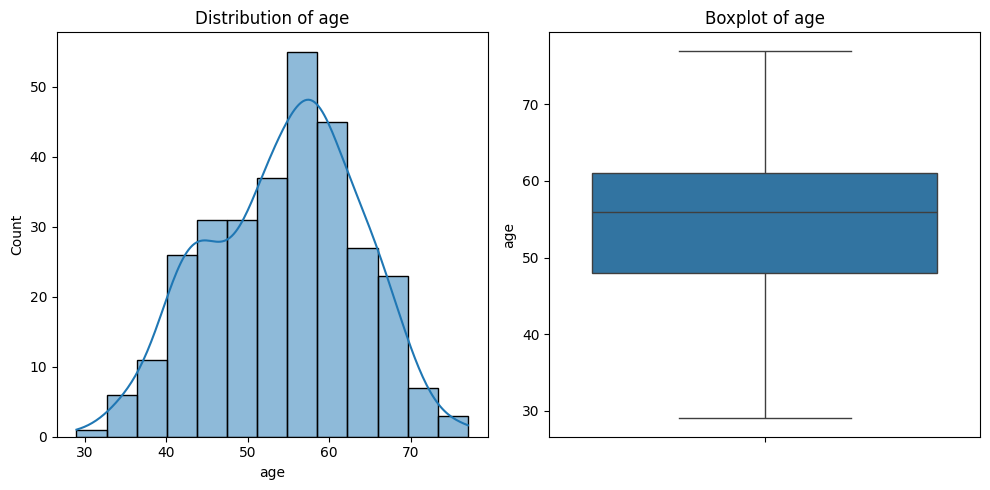

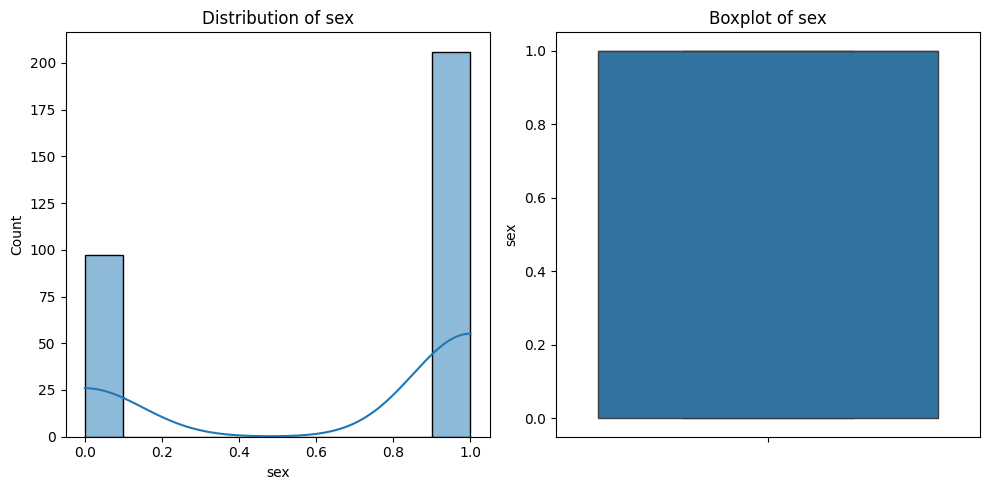

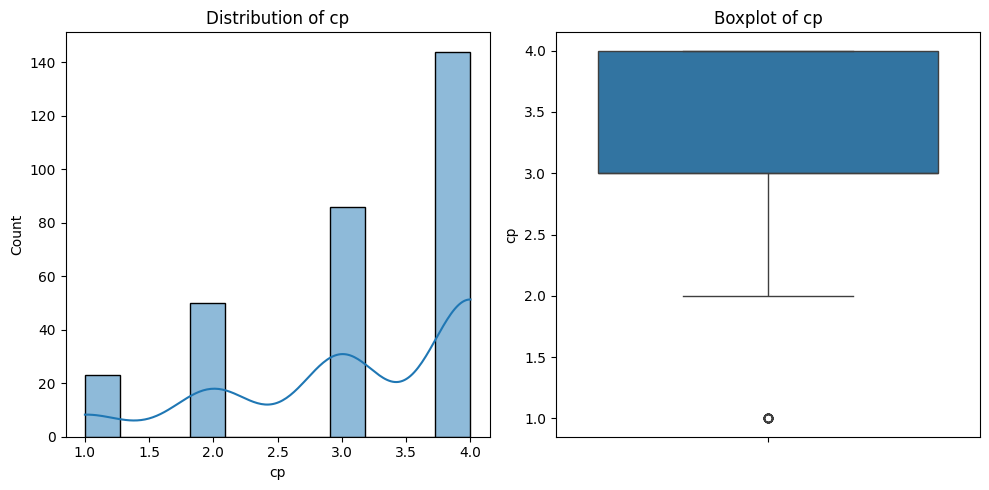

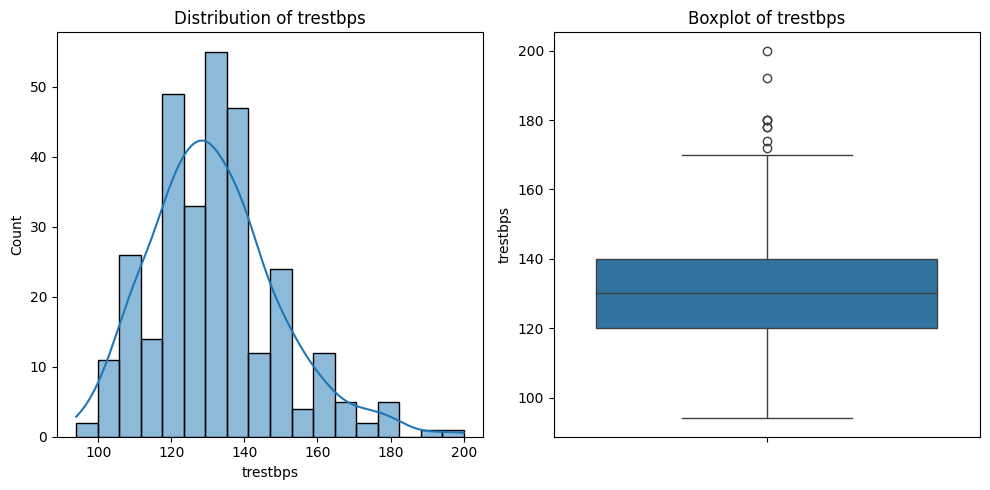

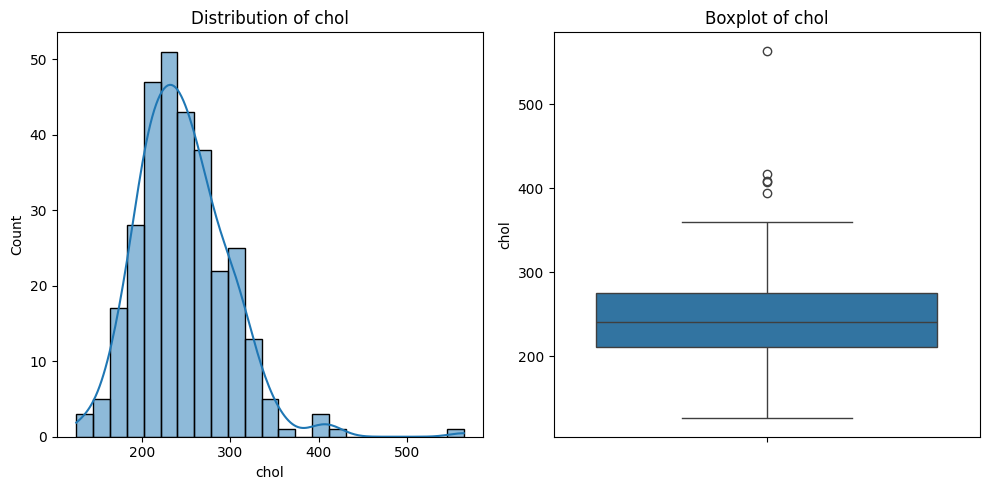

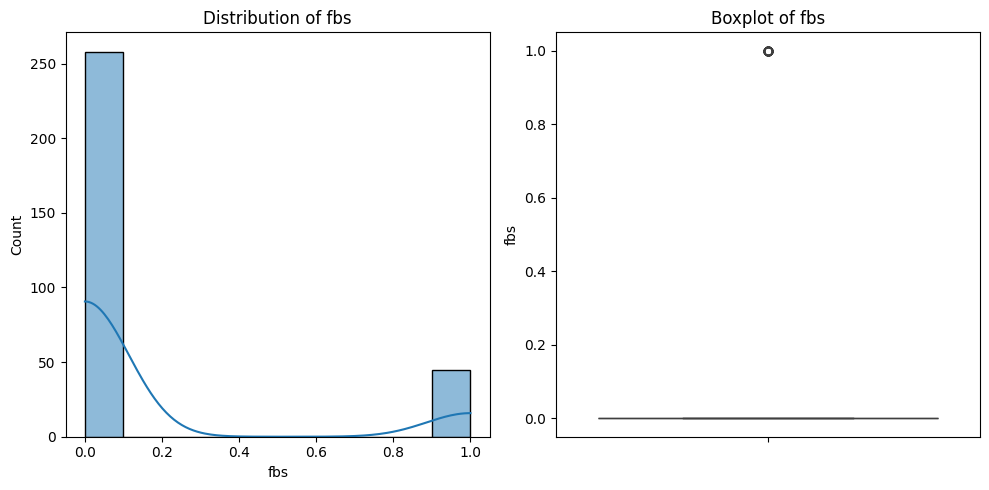

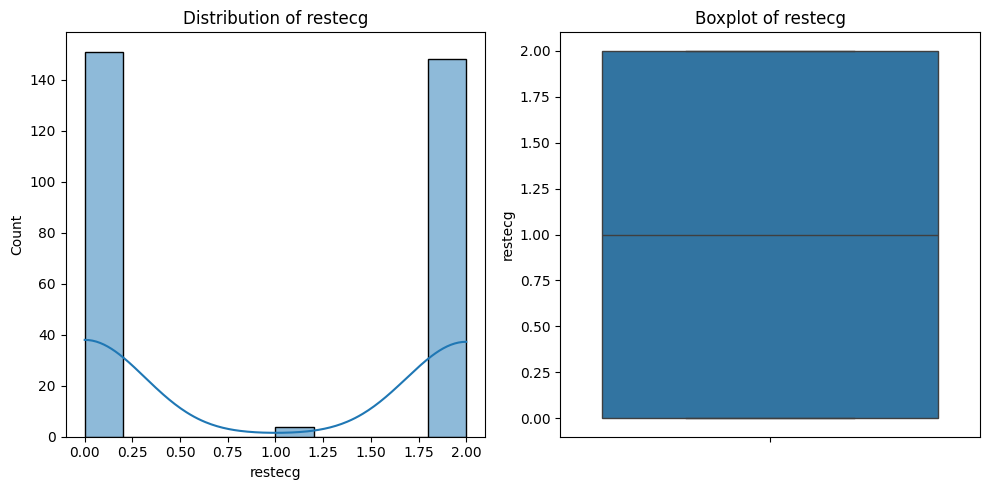

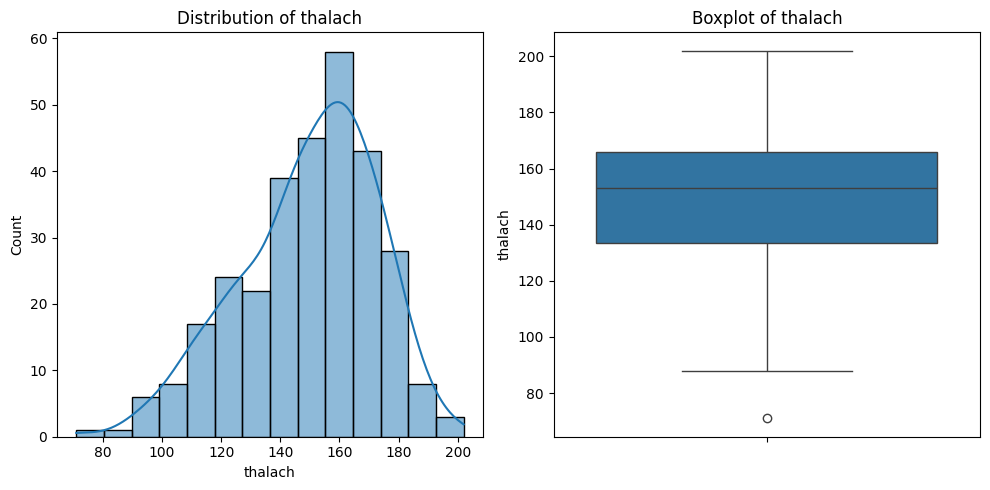

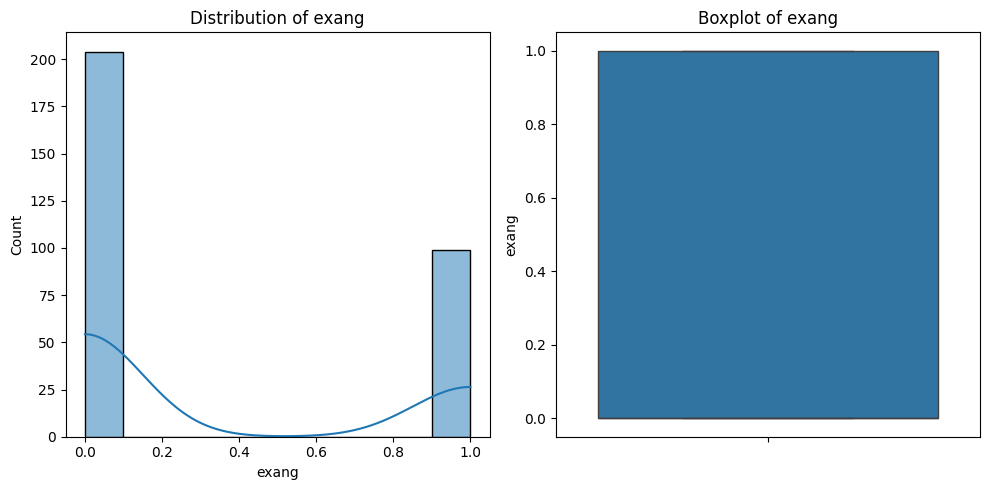

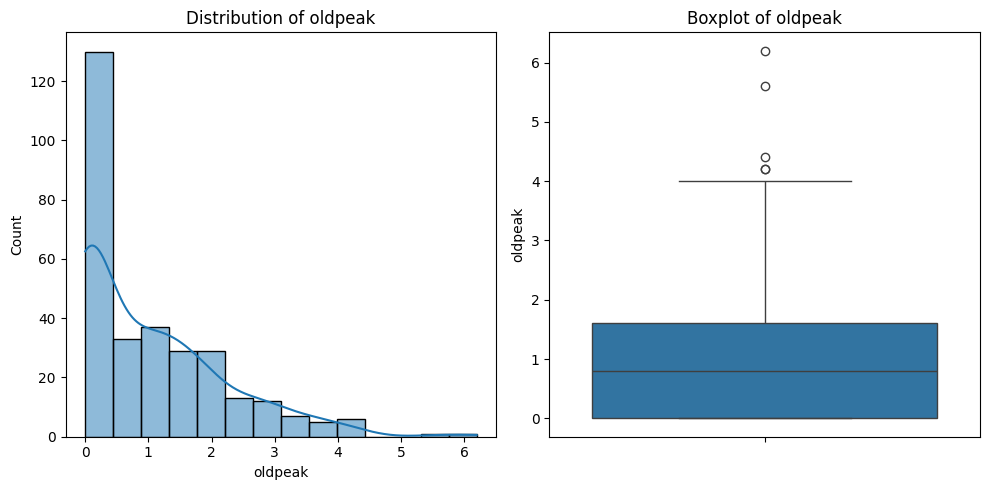

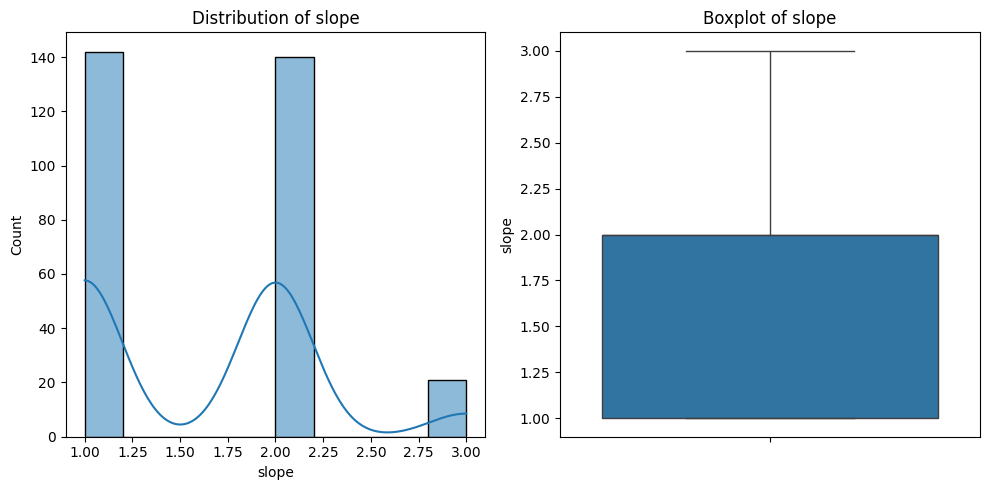

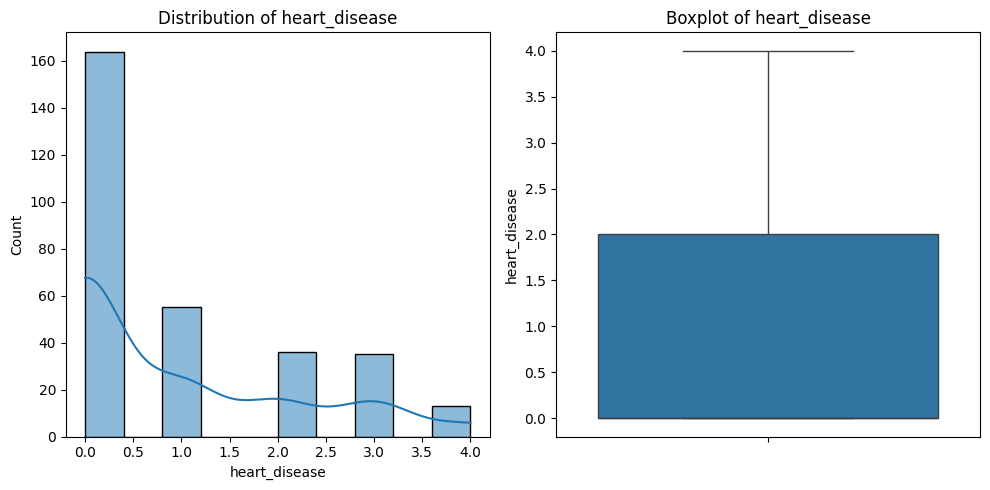

In [15]:
# Visualize distributions of numerical variables
def plot_distributions(df, cols, figsize=(10, 5)):
    for col in cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # Histogram with KDE
        sns.histplot(df[col], kde=True, ax=ax1)
        ax1.set_title(f'Distribution of {col}')
        
        # Boxplot
        sns.boxplot(y=df[col], ax=ax2)
        ax2.set_title(f'Boxplot of {col}')
        
        # Layout so plots do not overlap
        fig.tight_layout()
        
        plt.show()

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions
plot_distributions(df, numerical_cols)

## 2. Categorical Variables

This cell analyzes categorical variables using bar charts.


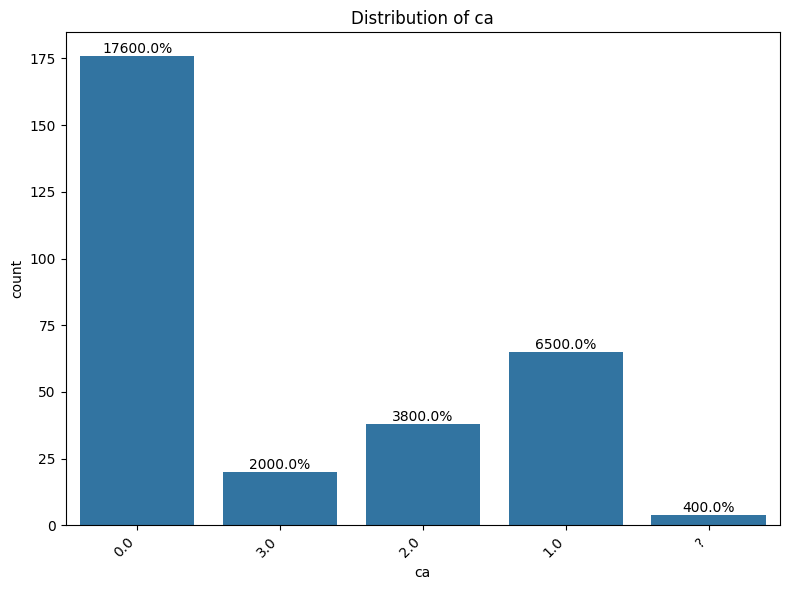

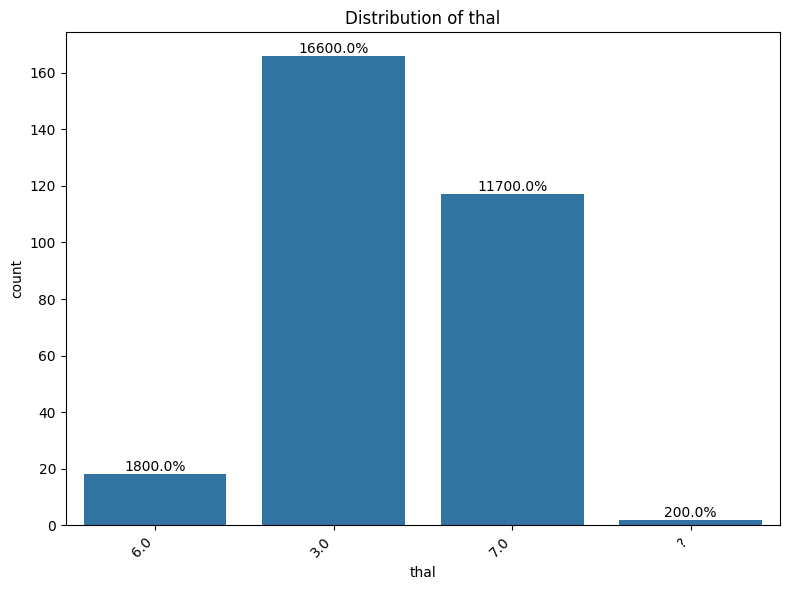

In [20]:
def plot_categorical_distributions(df, categorical_cols, figsize=(8, 6), max_categories=20):
    for col in categorical_cols:
        # Get top N categories
        top_categories = df[col].value_counts().index[:max_categories]
        
        # Filter the DataFrame to only include top categories
        filtered_df = df[df[col].isin(top_categories)]
        
        # Create the plot
        plt.figure(figsize=figsize)
        sns.countplot(x=col, data=filtered_df)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        
        # Add percentage labels
        for p in plt.gca().patches:
            height = p.get_height()
            plt.text(p.get_x() + p.get_width()/2., height, f'{height:.1%}', ha="center", va="bottom")
        
        plt.tight_layout()
        plt.show()

# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
plot_categorical_distributions(df, categorical_cols)

# Task 4: Bivariate Analysis

This task involves exploring relationships between numerical-numerical, categorical-numerical, and categorical-categorical variables.


## 1. Numerical-Numerical Relationships

This cell creates scatterplots to explore relationships between numerical variables and calculates the correlation matrix.


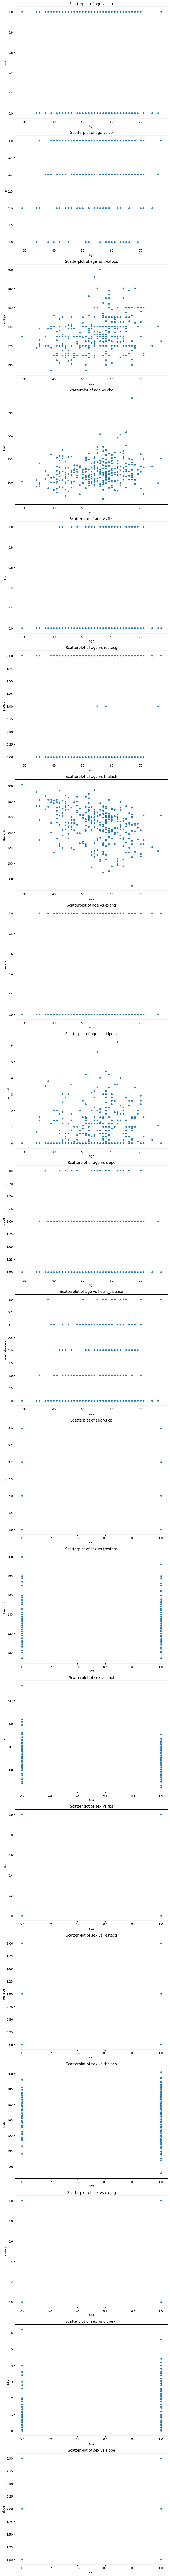

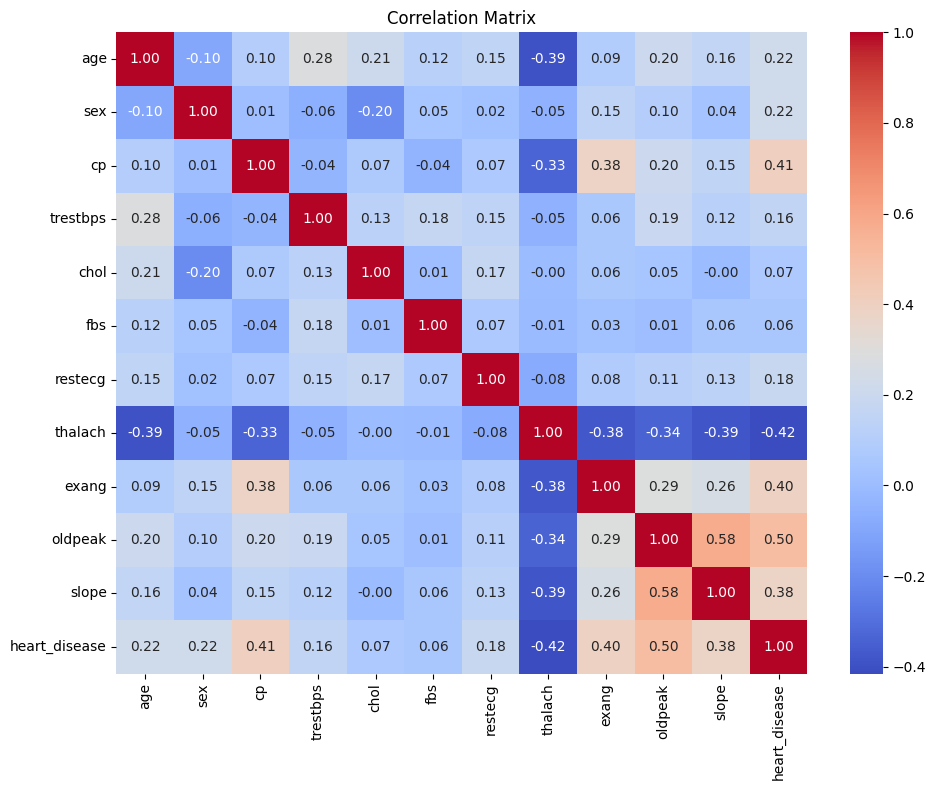

In [27]:
from itertools import combinations


def plot_scatterplots(df, cols, figsize=(8, 6), max_plots=20):
    """Plot scatterplots for all pairs of columns in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the data to plot.
        cols (list): List of column names to plot.
        figsize (tuple, optional): Size of the figure in inches. Defaults to (8, 6).
        max_plots (int, optional): Maximum number of plots to generate. Defaults to 20.

    Returns:
        None
    """
    # Calculate the total number of scatterplots to be generated
    num_cols = len(cols)
    total_plots = num_cols * (num_cols - 1) // 2  # Calculate the total number of pairs using the formula for combinations

    # Check if the total number of plots exceeds the maximum allowed
    if total_plots > max_plots:
        # Print a warning message if the total number of plots exceeds the maximum allowed
        print(f"Warning: {total_plots} scatterplots would be generated. Limiting to {max_plots} plots.")
        # Limit the number of pairs to the maximum allowed
        pairs = list(combinations(cols, 2))[:max_plots]
    else:
        # Generate all possible pairs of columns
        pairs = list(combinations(cols, 2))

    # Create a figure with a separate subplot for each pair of columns
    fig, axes = plt.subplots(nrows=len(pairs), ncols=1, figsize=(figsize[0], figsize[1]*len(pairs)))

    # Iterate over each pair of columns and generate a scatterplot
    for i, (col1, col2) in enumerate(pairs):
        # Generate a scatterplot for the current pair of columns
        sns.scatterplot(x=df[col1], y=df[col2], ax=axes[i])
        # Set the title of the current subplot
        axes[i].set_title(f'Scatterplot of {col1} vs {col2}')

    # Adjust the layout of the subplots to ensure they fit within the figure
    plt.tight_layout()
    # Display the plot
    plt.show()

def plot_correlation_matrix(df, figsize=(10, 8)):
    """Plot a correlation matrix for a given DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the data to plot.
        figsize (tuple, optional): Size of the figure in inches. Defaults to (10, 8).

    Returns:
        None

    Notes:
        This function generates a heatmap of the correlation matrix for the input DataFrame.
        The correlation matrix is calculated using the corr() method of the DataFrame.
        The heatmap is displayed using seaborn's heatmap function.
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    if numeric_df.empty:
        print("No numeric columns found. Cannot create correlation matrix.")
        return
    
    # Calculate the correlation matrix for the input DataFrame
    correlation_matrix = numeric_df.corr()  # Use the corr() method to calculate the correlation matrix

    # Create a new figure with a specified size
    plt.figure(figsize=figsize)  # Set the figure size to the specified value

    # Generate a heatmap of the correlation matrix
    sns.heatmap(correlation_matrix, 
                annot=True,  # Display the correlation values on the heatmap
                cmap='coolwarm',  # Use a coolwarm color map for the heatmap
                fmt=".2f")  # Format the correlation values to two decimal places

    # Set the title of the heatmap
    plt.title('Correlation Matrix')  # Display the title of the heatmap

    # Adjust the layout of the heatmap to ensure it fits within the figure
    plt.tight_layout()  # Adjust the layout to avoid overlapping elements

    # Display the heatmap
    plt.show()  # Display the heatmap

# Explore numerical-numerical relationships
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_scatterplots(df, numerical_cols)

# Calculate and display correlation matrix
plot_correlation_matrix(df)

## 2. Categorical-Numerical Relationships

This cell compares the target variable across independent variables using boxplots.


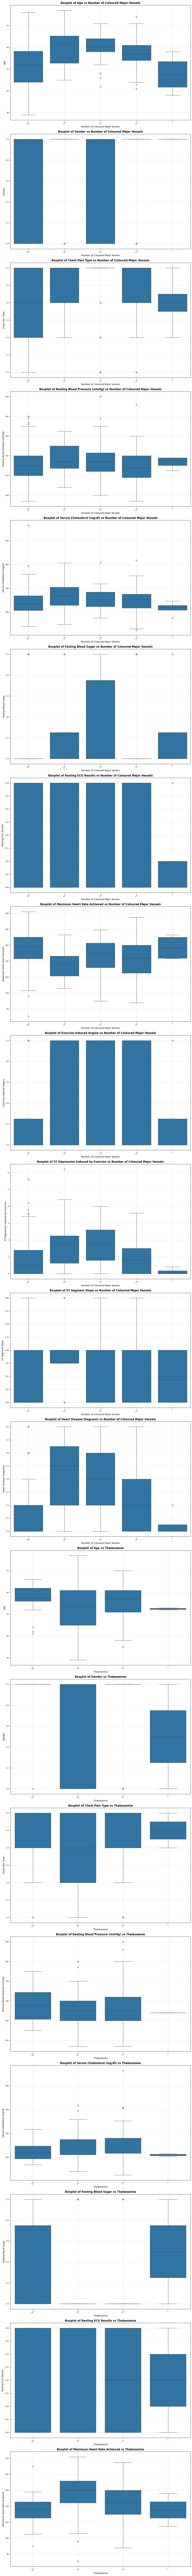

In [45]:
from itertools import product

def plot_boxplots(df, categorical_cols, numerical_cols, figsize=(12, 8), max_plots=20):
    """Plot boxplots for all pairs of categorical and numerical columns in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the data to plot.
        categorical_cols (list): List of categorical column names.
        numerical_cols (list): List of numerical column names.
        figsize (tuple, optional): Size of the figure in inches. Defaults to (12, 8).
        max_plots (int, optional): Maximum number of plots to generate. Defaults to 20.

    Returns:
        None
    """
    # Calculate the total number of boxplots to be generated
    total_plots = len(categorical_cols) * len(numerical_cols)
    
    if total_plots > max_plots:
        print(f"Warning: {total_plots} boxplots would be generated. Limiting to {max_plots} plots.")
        pairs = list(product(categorical_cols, numerical_cols))[:max_plots]
    else:
        pairs = list(product(categorical_cols, numerical_cols))
    
    # Create a figure with a separate subplot for each pair of columns
    fig, axes = plt.subplots(nrows=len(pairs), ncols=1, figsize=(figsize[0], figsize[1]*len(pairs)))
    
    # If there's only one plot, make sure axes is a list
    if isinstance(axes, plt.Axes):
        axes = [axes]
    
    # Define dictionaries for mapping column names to more descriptive labels
    # x-axis
    cat_label_map = {
        'sex': 'Gender',
        'cp': 'Chest Pain Type',
        'restecg': 'Resting ECG Results',
        'exang': 'Exercise-Induced Angina',
        'slope': 'ST Segment Slope',
        'thal': 'Thalassemia',
        'heart_disease': 'Heart Disease Diagnosis',
        'ca': 'Number of Coloured Major Vessels',
        'fbs': 'Fasting Blood Sugar',
        
        
    }
    
    # y-axis
    num_label_map = {
        'trestbps': 'Resting Blood Pressure (mmHg)',
        'chol': 'Serum Cholesterol (mg/dl)',
        'thalach': 'Maximum Heart Rate Achieved',
        'oldpeak': 'ST Depression Induced by Exercise',
        'ca': 'Coloured Major Vessels',
        'cp':'Chest Pain Type',
        'fbs':'Fasting Blood Sugar',
        'restecg':'Resting ECG Results',
        'exang':'Exercise-Induced Angina',
        'slope':'ST Segment Slope',
        'thal':'Thalassemia',
        'heart_disease':'Heart Disease Diagnosis',
        'sex': 'Gender',
    }
    
    # Iterate over each pair of columns and generate a boxplot
    for i, (cat_col, num_col) in enumerate(pairs):
        # Generate a boxplot for the current pair of columns
        sns.boxplot(x=df[cat_col], y=df[num_col], ax=axes[i])
        
        # Get descriptive labels using the label_map dictionaries
        cat_label = cat_label_map.get(cat_col, cat_col.capitalize())
        num_label = num_label_map.get(num_col, num_col.capitalize())
        
        axes[i].set_title(f'Boxplot of {num_label} vs {cat_label}', fontsize=12, fontweight='bold')
        
        # Customize the appearance of the boxplot
        axes[i].set_xlabel(cat_label, fontsize=10)
        axes[i].set_ylabel(num_label, fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Adjust the layout of the subplots to ensure they fit within the figure
    plt.tight_layout()
    # Display the plot
    plt.show()

# Compare target across independent variables using boxplots
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_boxplots(df, categorical_cols, numerical_cols)

### Does the same task as above code


In [ ]:
# Compare target across independent variables using boxplots
# categorical_cols = df.select_dtypes(include=['object']).columns
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# for cat_col in categorical_cols:
#     for num_col in numerical_cols:
#         plt.figure(figsize=(8, 6))
#         sns.boxplot(x=df[cat_col], y=df[num_col])
#         plt.title(f'Boxplot of {num_col} vs {cat_col}')
#         plt.xticks(rotation=45, ha='right')
#         plt.show()

## 3. Categorical-Categorical Relationships

This cell creates crosstabs to explore relationships between categorical variables.


In [32]:
# Explore categorical-categorical relationships
categorical_cols = df.select_dtypes(include=['object']).columns
for cat_col1 in categorical_cols:
    for cat_col2 in categorical_cols:
        if cat_col1 != cat_col2:
            crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
            print(f'Crosstab of {cat_col1} vs {cat_col2}:\n{crosstab}\n')

Crosstab of ca vs thal:
thal  3.0  6.0  7.0  ?
ca                    
0.0   115    8   51  2
1.0    29    4   32  0
2.0    14    4   20  0
3.0     6    2   12  0
?       2    0    2  0

Crosstab of thal vs ca:
ca    0.0  1.0  2.0  3.0  ?
thal                       
3.0   115   29   14    6  2
6.0     8    4    4    2  0
7.0    51   32   20   12  2
?       2    0    0    0  0



### More visualized form of above cross-tab code


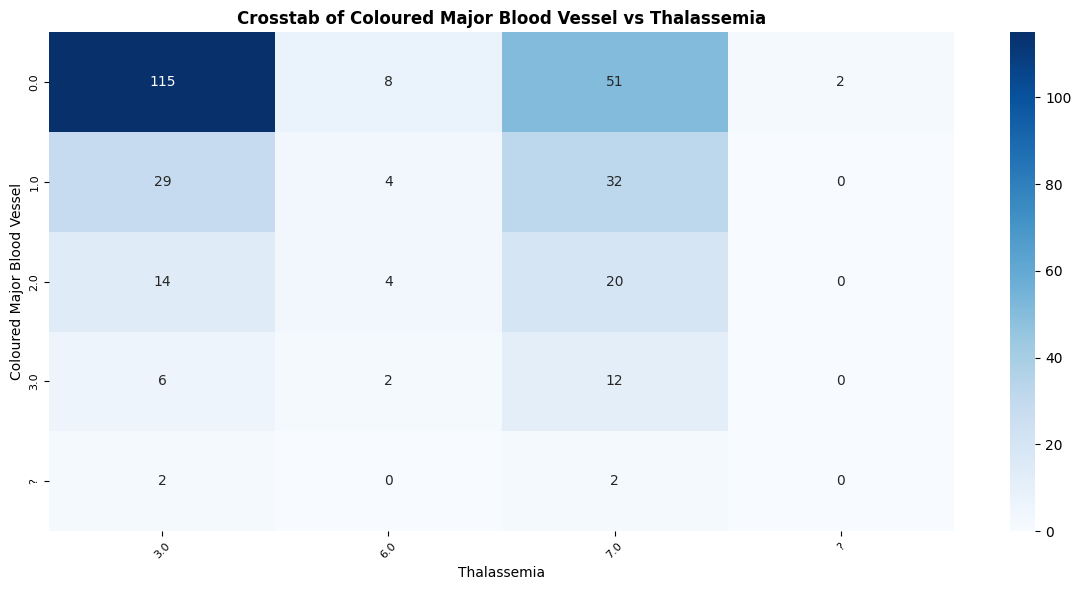

In [47]:


def plot_crosstabs(df, categorical_cols, max_plots=20):
    """Plot heatmaps for all pairs of categorical columns in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the data to plot.
        categorical_cols (list): List of categorical column names.
        max_plots (int, optional): Maximum number of plots to generate. Defaults to 20.

    Returns:
        None
    """
    # Calculate the total number of crosstabs to be generated
    total_plots = len(list(combinations(categorical_cols, 2)))
    
    if total_plots > max_plots:
        print(f"Warning: {total_plots} crosstabs would be generated. Limiting to {max_plots} plots.")
        pairs = list(combinations(categorical_cols, 2))[:max_plots]
    else:
        pairs = list(combinations(categorical_cols, 2))
    
    # Create a figure with a separate subplot for each pair of columns
    fig, axes = plt.subplots(nrows=len(pairs), ncols=1, figsize=(12, 6*len(pairs)))
    
    # If there's only one plot, make sure axes is a list
    if isinstance(axes, plt.Axes):
        axes = [axes]
    
    # Define a dictionary for mapping column names to more descriptive labels
    label_map = {
        'sex': 'Gender',
        'cp': 'Chest Pain Type',
        'restecg': 'Resting ECG Results',
        'exang': 'Exercise-Induced Angina',
        'slope': 'ST Segment Slope',
        'thal': 'Thalassemia',
        'heart_disease': 'Heart Disease Diagnosis',
        'ca': 'Coloured Major Blood Vessel'
    }
    
    # Iterate over each pair of columns and generate a heatmap
    for i, (cat_col1, cat_col2) in enumerate(pairs):
        # Generate a crosstab for the current pair of columns
        crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
        
        # Generate a heatmap for the current pair of columns
        sns.heatmap(crosstab, ax=axes[i], annot=True, cmap='Blues', fmt='d', center=crosstab.max().max()/2)
        
        # Get descriptive labels using the label_map dictionary
        cat_label1 = label_map.get(cat_col1, cat_col1.capitalize())
        cat_label2 = label_map.get(cat_col2, cat_col2.capitalize())
        
        axes[i].set_title(f'Crosstab of {cat_label1} vs {cat_label2}', fontsize=12, fontweight='bold')
        
        # Customize the appearance of the heatmap
        axes[i].set_xlabel(cat_label2, fontsize=10)
        axes[i].set_ylabel(cat_label1, fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)
    
    # Adjust the layout of the subplots to ensure they fit within the figure
    plt.tight_layout()
    # Display the plot
    plt.show()

# Explore categorical-categorical relationships
categorical_cols = df.select_dtypes(include=['object']).columns
plot_crosstabs(df, categorical_cols)

# Task 5: Multivariate Analysis

This task uses pairplots to visualize multiple relationships.


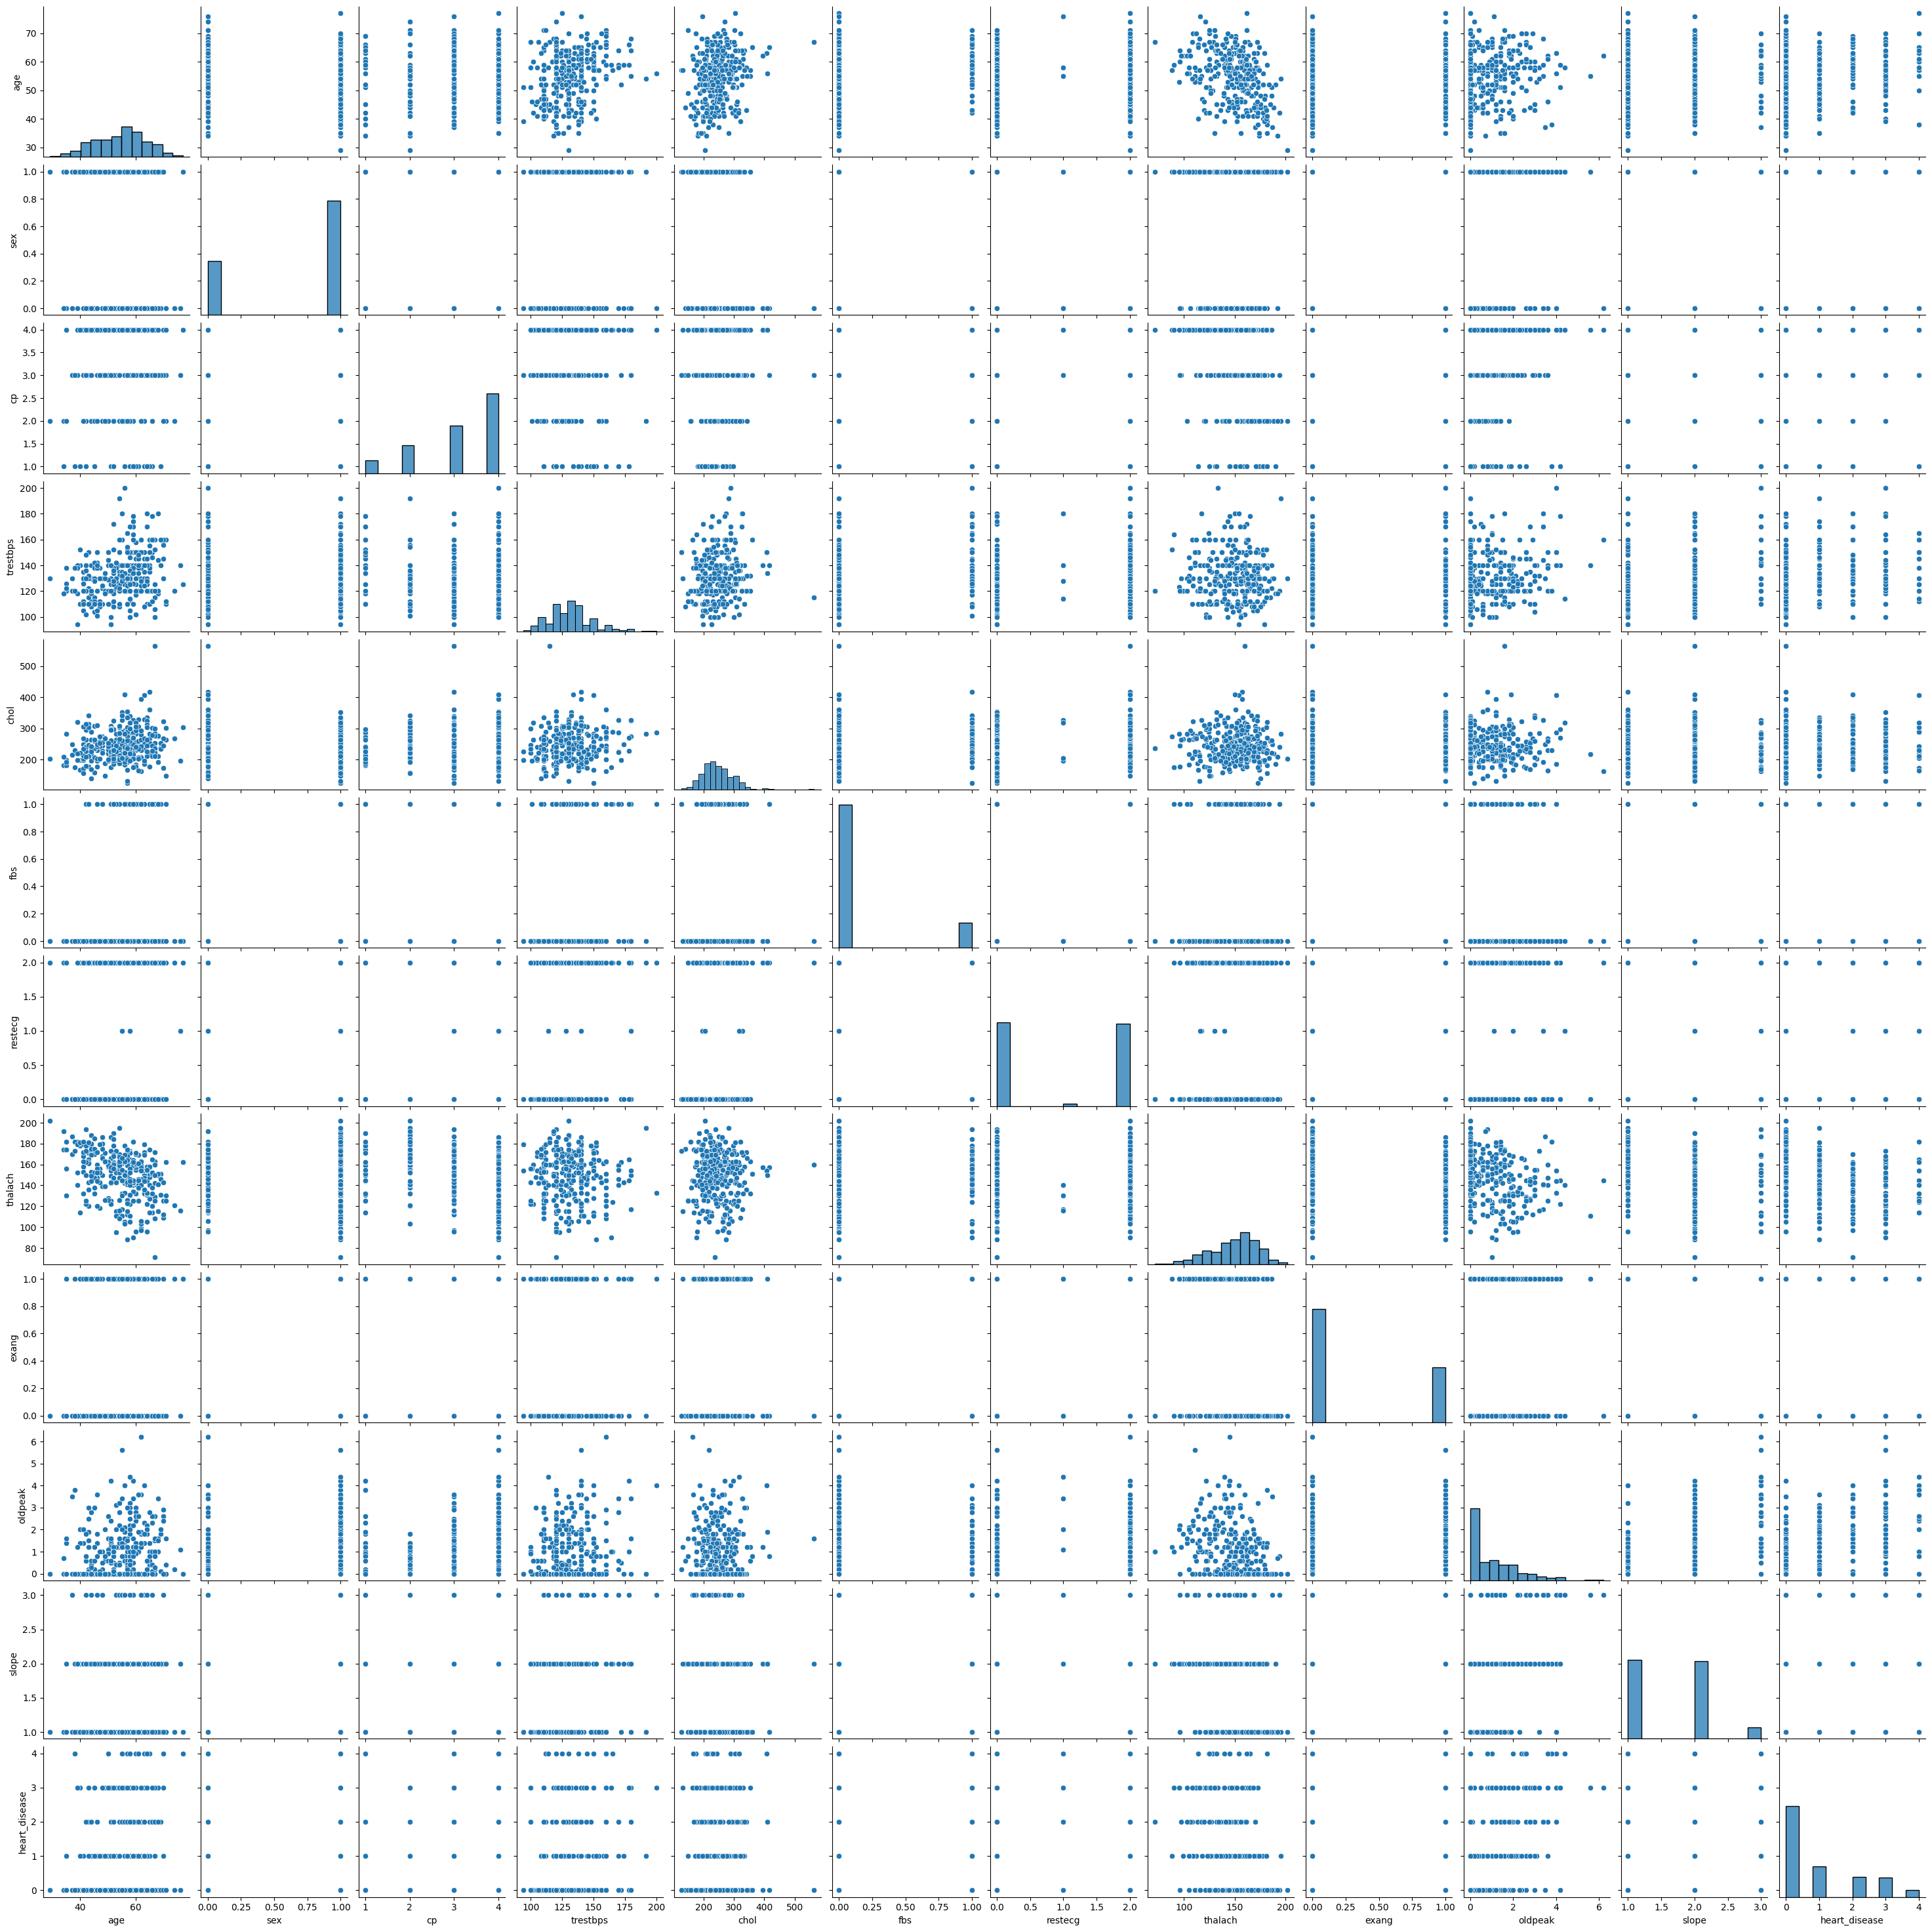

In [48]:
# Visualize multiple relationships using pairplots
sns.pairplot(df)

# Task 6: Communication of Insights

This task summarizes the findings and provides answers to the questions in the deliverables. Go to `./Health_EDA_Report.md`
